In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load World Cup Matches dataset
matches_df = pd.read_csv('data/WorldCupMatches.csv')
players_df = pd.read_csv('data/WorldCupPlayers.csv')
worldcups_df = pd.read_csv('data/WorldCups.csv')

# Data overview
print(matches_df.head(3))

print(players_df.head(3))
print(worldcups_df.head(3))



     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1                    18346.0                   2.0                   0.0   
2                    24059.0                   2.0                   0.0   

                  Referee               Assistant 1            Assistant 2  \
0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (

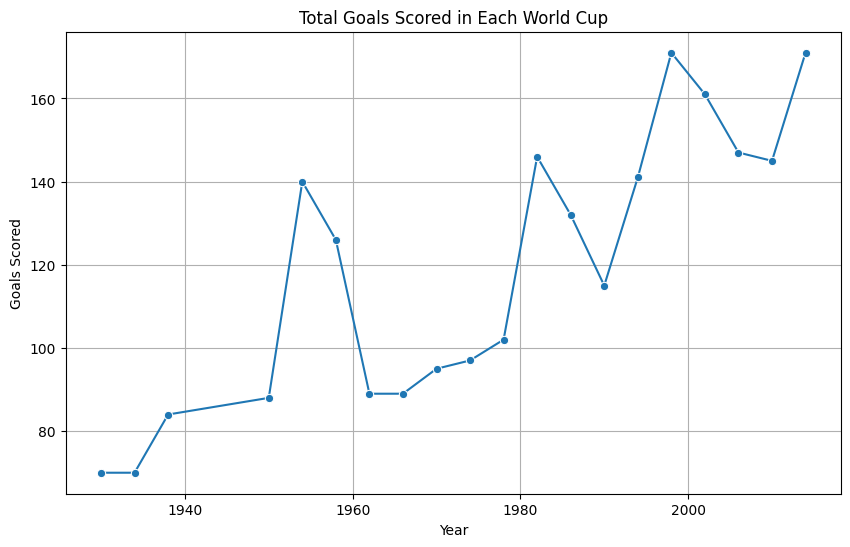

In [7]:
# Key metrics: Number of goals scored in each World Cup
worldcup_goals = worldcups_df[['Year', 'GoalsScored']].sort_values('Year')
plt.figure(figsize=(10, 6))
sns.lineplot(data=worldcup_goals, x='Year', y='GoalsScored', marker='o')
plt.title('Total Goals Scored in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

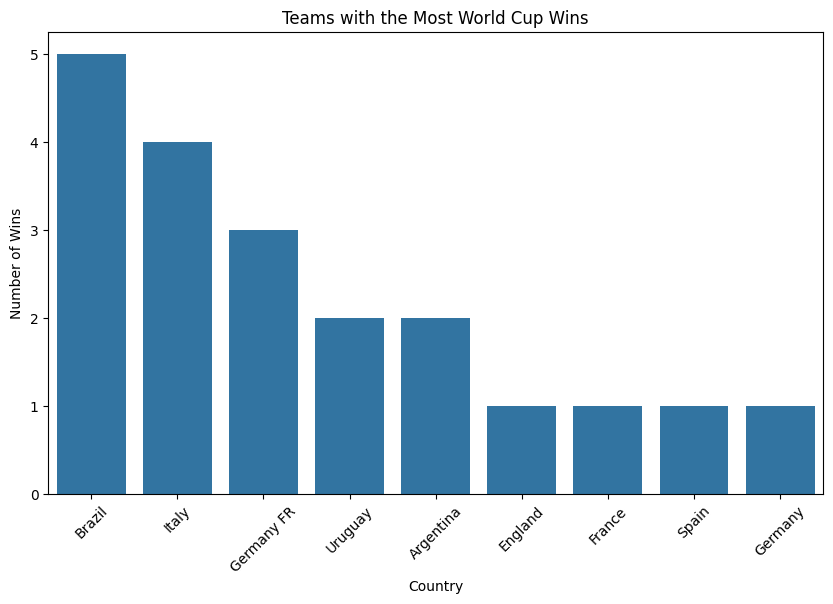

In [8]:
# Teams with the most World Cup wins
worldcup_winners = worldcups_df['Winner'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=worldcup_winners.index, y=worldcup_winners.values)
plt.title('Teams with the Most World Cup Wins')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Count of times a host country won the World Cup
host_wins = worldcups_df[worldcups_df['Winner'] == worldcups_df['Country']]
print(f"Host country won {len(host_wins)} times.")
print(host_wins[['Year', 'Country', 'Winner']])


Host country won 5 times.
    Year    Country     Winner
0   1930    Uruguay    Uruguay
1   1934      Italy      Italy
7   1966    England    England
10  1978  Argentina  Argentina
15  1998     France     France


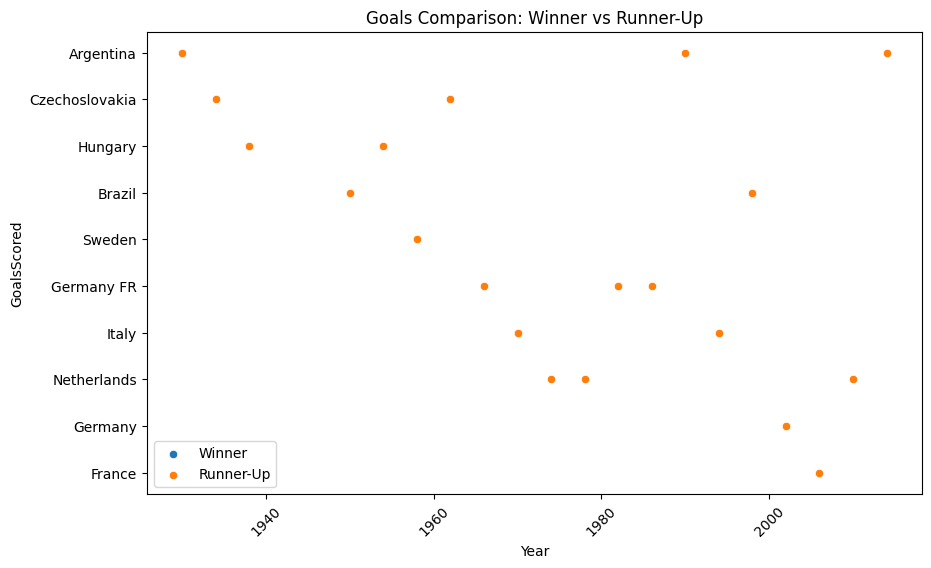

In [22]:
# Plotting goals of the winner vs runner-up in each World Cup
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='GoalsScored', data=worldcups_df, label='Winner')
sns.scatterplot(x='Year', y='Runners-Up', data=worldcups_df, label='Runner-Up')
plt.title('Goals Comparison: Winner vs Runner-Up')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [20]:
worldcups_df.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


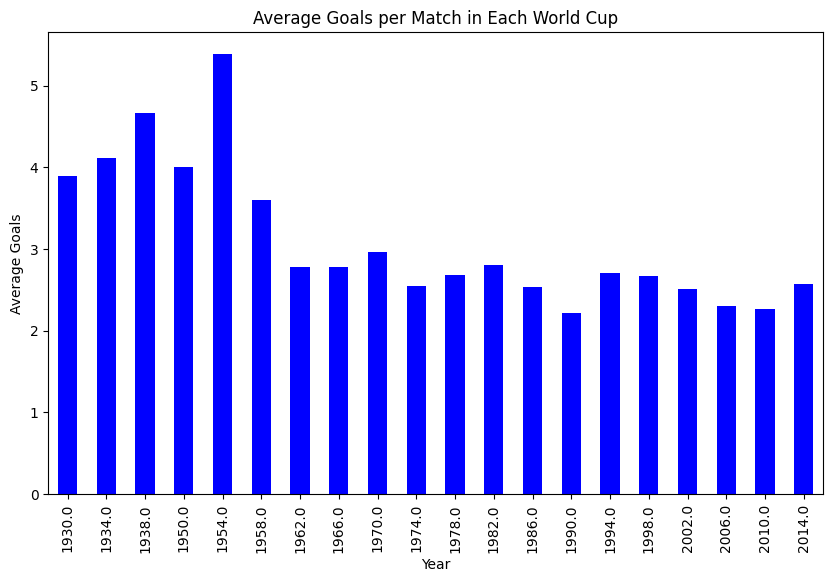

In [24]:
# Calculate average goals per match for each World Cup
matches_df['TotalGoals'] = matches_df['Home Team Goals'] + matches_df['Away Team Goals']
avg_goals = matches_df.groupby('Year')['TotalGoals'].mean()

# Plot average goals per match
plt.figure(figsize=(10, 6))
avg_goals.plot(kind='bar', color='blue')
plt.title('Average Goals per Match in Each World Cup')
plt.ylabel('Average Goals')
plt.show()


Brazil         71.0
Italy          45.0
Argentina      44.0
Germany FR     36.0
Germany        34.0
France         29.0
Netherlands    29.0
Spain          29.0
England        26.0
Uruguay        20.0
Name: count, dtype: float64


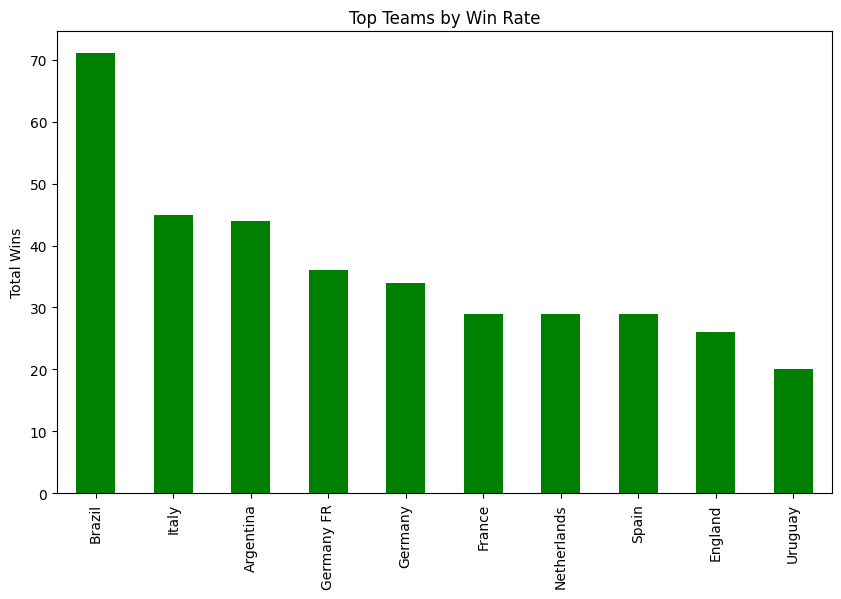

In [25]:
# Calculate win rate for each country in the World Cup matches
win_home = matches_df[matches_df['Home Team Goals'] > matches_df['Away Team Goals']]['Home Team Name'].value_counts()
win_away = matches_df[matches_df['Away Team Goals'] > matches_df['Home Team Goals']]['Away Team Name'].value_counts()

# Combine home and away wins
total_wins = win_home.add(win_away, fill_value=0).sort_values(ascending=False).head(10)
print(total_wins)

# Plot top teams by win rate
plt.figure(figsize=(10, 6))
total_wins.plot(kind='bar', color='green')
plt.title('Top Teams by Win Rate')
plt.ylabel('Total Wins')
plt.show()
